In [ ]:

.# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Check TensorFlow version
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.17.0


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
y = to_categorical(y)

# Reshape the data to fit the CNN input format
# CNN expects 4D input: (batch_size, height, width, channels)
# We will reshape each 1D data point of length 4 to 2D shape (2, 2) with 1 channel
X = X.reshape(-1, 2, 2, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (120, 2, 2, 1)
Testing data shape: (30, 2, 2, 1)


In [ ]:
# Initialize the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(2, 2, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(1, 1)))

# Flatten the output
model.add(Flatten())

# Add a fully connected (dense) layer
model.add(Dense(10, activation='relu'))

# Add the output layer (3 classes in Iris dataset)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 1, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523 (2.04 KB)

 Trainable params: 523 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 - 3s - 126ms/step - accuracy: 0.2917 - loss: 1.0882
Epoch 2/50
24/24 - 0s - 4ms/step - accuracy: 0.8250 - loss: 1.0203
Epoch 3/50
24/24 - 0s - 7ms/step - accuracy: 0.7333 - loss: 0.9688
Epoch 4/50
24/24 - 0s - 4ms/step - accuracy: 0.8417 - loss: 0.9076
Epoch 5/50
24/24 - 0s - 5ms/step - accuracy: 0.7167 - loss: 0.8478
Epoch 6/50
24/24 - 0s - 7ms/step - accuracy: 0.9250 - loss: 0.7899
Epoch 7/50
24/24 - 0s - 8ms/step - accuracy: 0.7167 - loss: 0.7225
Epoch 8/50
24/24 - 0s - 9ms/step - accuracy: 0.8833 - loss: 0.6522
Epoch 9/50
24/24 - 0s - 8ms/step - accuracy: 0.9333 - loss: 0.5948
Epoch 10/50
24/24 - 0s - 3ms/step - accuracy: 0.8750 - loss: 0.5501
Epoch 11/50
24/24 - 0s - 2ms/step - accuracy: 0.9333 - loss: 0.5142
Epoch 12/50
24/24 - 0s - 2ms/step - accuracy: 0.8500 - loss: 0.4720
Epoch 13/50
24/24 - 0s - 2ms/step - accuracy: 0.9750 - loss: 0.4407
Epoch 14/50
24/24 - 0s - 2ms/step - accuracy: 0.9750 - loss: 0.4146
Epoch 15/50
24/24 - 0s - 2ms/step - accuracy: 0.9417 - 

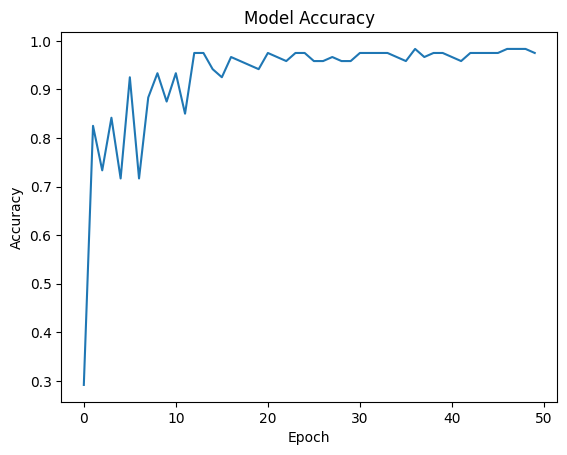

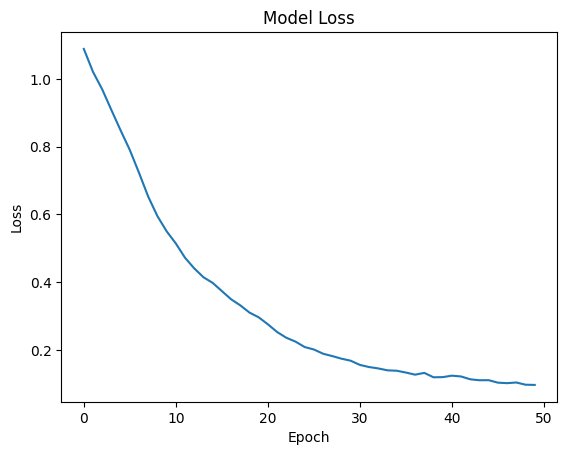

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=2)

# Plot training accuracy and loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predict classes for test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Print predicted classes
print("Predicted Classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 1.0000 - loss: 0.0947
Test Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Predicted Classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
